# Puzzel:
From Chris Thornett, a special game of hot potato:

A class of 30 children is playing a game where they all stand in a circle along with their teacher. The teacher is holding two things: a coin and a potato. The game progresses like this: The teacher tosses the coin. Whoever holds the potato passes it to the left if the coin comes up heads and to the right if the coin comes up tails. The game ends when every child except one has held the potato, and the one who hasn’t is declared the winner.

How do a child’s chances of winning change depending on where they are in the circle? In other words, what is each child’s win probability?

# Name: Ning Mei
# email: nm2241@nyu.edu
# github: @adowaconan

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter

In [5]:
import seaborn as sns

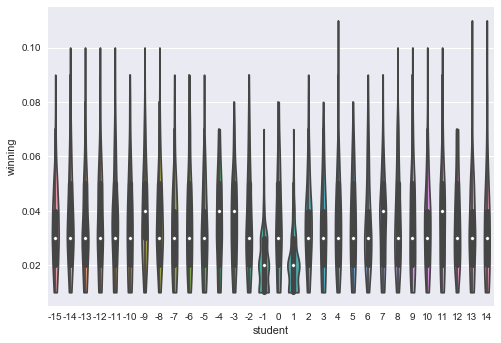

In [13]:
df = {'student':[],'winning':[]}
for time in range(200):
    result = []
    for game in range(100):
        student = {a:0 for a in np.arange(-15,15)}
        hold = 0
        for ii in range(int(1e30)):
            coin = np.random.choice([0,1],size=1)[0]
            if coin:
                hold += 1
                if hold > 14:
                    hold = -15
                student[hold] += 1
            else:
                hold -= 1
                if hold < -15:
                    hold = 14
                student[hold] += 1
            check = np.array([value for key,value in student.items()])
            if len(np.where(check == 0)[0]) == 1:
                break
        winner = [key for key,value in student.items() if value == 0][0]
        #print('winner:%d,played:%d'%(winner,ii))
        result.append(winner)    
    for key,value in dict(Counter(result)).items():
        df['student'].append(key)
        df['winning'].append(value/100)

df = pd.DataFrame(df)

sns.violinplot(x='student',y='winning',data=df,cut=0)

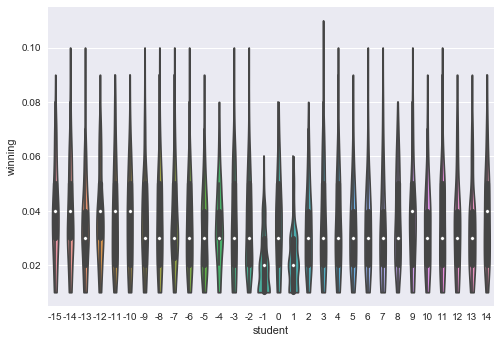

In [14]:
df = {'student':[],'winning':[]}
for time in range(200):
    result = []
    for game in range(100):
        student = {a:0 for a in np.arange(-15,15)}
        hold = 0
        for ii in range(int(1e30)):
            coin = np.random.choice([0,1],size=1)[0]
            if coin:
                hold += 1
                if hold > 14:
                    hold = -15
                student[hold] += 1
            else:
                hold -= 1
                if hold < -15:
                    hold = 14
                student[hold] += 1
            check = np.array([value for key,value in student.items()])
            if len(np.where(check == 0)[0]) == 1:
                break
        winner = [key for key,value in student.items() if value == 0][0]
        #print('winner:%d,played:%d'%(winner,ii))
        result.append(winner)    
    for key,value in dict(Counter(result)).items():
        df['student'].append(key)
        df['winning'].append(value/100)

df = pd.DataFrame(df)

sns.violinplot(x='student',y='winning',data=df,cut=0)

# Observation from 2 simulations:

1. students right next to the starting student have the lowest chance to win. 
2. besides these two students, other students have similar chance to win. In fact, they have almost the same chance to win.